In [1]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
from core.data_processor import DataLoader
from core.model import Model
from core.utils import *

## 加载配置文件及组装模型

In [2]:
def main():
    configs = json.load(open(config, 'r'))
    if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])

    data = DataLoader(
        os.path.join('data', configs['data']['filename']),
        configs['data']['columns'],
        train_end_data,
        test_start_data,
        configs['data']['sequence_length'],
        configs["data"]["test_data_num"],
        configs['data']['drop']
    )

    model = Model()
    model.build_model(configs)

    x_test, y_test, data_index = data.get_test_data(
        seq_len=configs['data']['sequence_length'],
        normalise=configs['data']['normalise'],
        raw_data = raw_data
    )

    if predict:
        steps_per_epoch = math.ceil(
            (data.len_train - configs['data']['sequence_length']) / configs['training']['batch_size'])
        model.train_generator(
            data_gen=data.generate_train_batch(
                seq_len=configs['data']['sequence_length'],
                batch_size=configs['training']['batch_size'],
                normalise=configs['data']['normalise']
            ),
            epochs=configs['training']['epochs'],
            batch_size=configs['training']['batch_size'],
            steps_per_epoch=steps_per_epoch,
            save_dir=configs['model']['save_dir'],
            datetime_now=test_start_data
        )
    else:
        model.load_model(os.path.join(configs['model']['save_dir'], "%s-e2.h5"%test_start_data))

    predictions = model.predict_sequences_multiple(x_test, configs['data']['sequence_length'],
                                                   configs['data']['sequence_length'])
    # predictions = model.predict_sequence_full(x_test, configs['data']['sequence_length'])
    # predictions = model.predict_point_by_point(x_test)
    print(predictions)
    plot_results_multiple(predictions, y_test, configs['data']['sequence_length'], data_index, raw_data)
    # plot_results(predictions, y_test)

## 模型训练及模型加载

[Model] Model Compiled
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 19, 100)           42800     
_________________________________________________________________
dropout (Dropout)            (None, 19, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 19, 100)           80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 203,701
Trainable params: 203,701
Non-trainable params: 0
___________________________

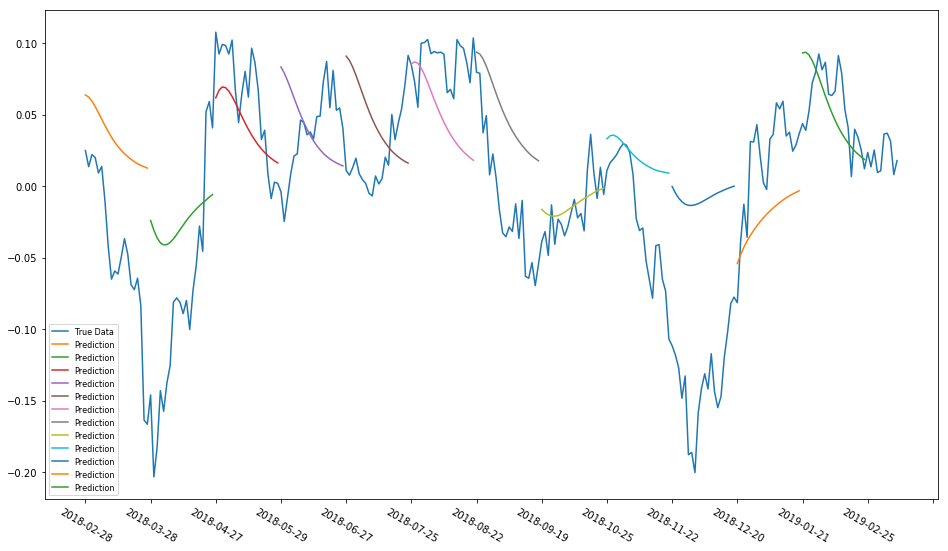

In [3]:
if __name__ == '__main__':
    config = 'config.json'
    predict = True
    raw_data = False
    # train_end_data, test_start_data = '2016-12-30', '2017-01-03'
#     ls=[['2017-12-29', '2018-01-02'], ['2018-01-30', '2018-01-31'], ['2018-02-27', '2018-02-28'], ['2018-03-29', '2018-03-30'], ['2018-04-27', '2018-05-02'], ['2018-05-30', '2018-05-31'], ['2018-06-28', '2018-06-29'], ['2018-07-30', '2018-07-31'], ['2018-08-30', '2018-08-31'], ['2018-09-28', '2018-10-08'], ['2018-10-30', '2018-10-31'], ['2018-11-29', '2018-11-30'], ['2018-12-28', '2019-01-02'], ['2019-01-30', '2019-01-31'], ['2019-02-27', '2019-02-28'], ['2019-03-28', '2019-03-29'], ['2019-04-30', '2019-05-06'], ['2019-05-30', '2019-05-31'], ['2019-06-27', '2019-06-28'], ['2019-07-30', '2019-07-31'], ['2019-08-29', '2019-08-30'], ['2019-09-30', '2019-10-08'], ['2019-10-30', '2019-10-31'], ['2019-11-28', '2019-11-29'], ['2019-12-31', '2020-01-02'], ['2020-01-23', '2020-02-03'], ['2020-02-28', '2020-03-02'], ['2020-03-31', '2020-04-01'], ['2020-04-30', '2020-05-06'], ['2020-05-28', '2020-05-29'], ['2020-06-29', '2020-06-30'], ['2020-07-30', '2020-07-31'], ['2020-08-28', '2020-08-31'], ['2020-09-30', '2020-10-09'], ['2020-10-29', '2020-10-30'], ['2020-11-27', '2020-11-30']]
    train_end_data, test_start_data = ['2018-02-27', '2018-02-28']
    main()
    
#     for i in ls:
#         train_end_data, test_start_data = i
#         main()

In [4]:
# import pandas as pd
# df = pd.read_csv("./data/my.csv",index_col=0)
# df["Close"].loc["2018-02-28":"2019-02-25"].plot()